In [16]:
import numpy as np
import pandas as pd
import os
import cv2

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, InputLayer, Flatten

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

In [21]:
X_train = []
Y_train = []
image_size = 112
labels = ['pituitary_tumor','no_tumor','meningioma_tumor','glioma_tumor']
for i in labels:
    folderPath = os.path.join(r"C:\Users\Acer\Downloads\BrainTumor\Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j),0)
        img = cv2.resize(img,(image_size,image_size))
        img = cv2.GaussianBlur(img, (5, 5), 1.0)
        img = cv2.equalizeHist(img)
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r"C:\Users\Acer\Downloads\BrainTumor\Testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j),0)
        img = cv2.resize(img,(image_size,image_size))
        img = cv2.GaussianBlur(img, (5, 5), 1.0)
        img = cv2.equalizeHist(img)
        X_train.append(img)
        Y_train.append(i)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [22]:
# X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
# X_train.shape

(3264, 112, 112)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.25,random_state=101)

In [24]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [32]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(112,112,1)))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.3))


model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Dense(4, activation="softmax"))


model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [33]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy", mode="max", 
                                        patience=10, restore_best_weights = True)

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 110, 110, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 55, 55, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 26, 26, 64)       

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history = model.fit(X_train,y_train,epochs=40,validation_split=0.1,callbacks=earlystopping)

Epoch 1/40
69/69 [==============================] - 31s 439ms/step - loss: 1.0807 - accuracy: 0.5615 - val_loss: 2.3233 - val_accuracy: 0.3673
Epoch 2/40
69/69 [==============================] - 28s 407ms/step - loss: 0.7533 - accuracy: 0.7140 - val_loss: 1.0905 - val_accuracy: 0.6286
Epoch 3/40
69/69 [==============================] - 30s 433ms/step - loss: 0.5988 - accuracy: 0.7690 - val_loss: 0.6995 - val_accuracy: 0.7388
Epoch 4/40
69/69 [==============================] - 27s 393ms/step - loss: 0.4687 - accuracy: 0.8293 - val_loss: 1.7380 - val_accuracy: 0.5347
Epoch 5/40
69/69 [==============================] - 25s 369ms/step - loss: 0.3785 - accuracy: 0.8643 - val_loss: 1.5875 - val_accuracy: 0.5265
Epoch 6/40
69/69 [==============================] - 26s 372ms/step - loss: 0.3193 - accuracy: 0.8852 - val_loss: 2.0633 - val_accuracy: 0.4367
Epoch 7/40
69/69 [==============================] - 31s 445ms/step - loss: 0.2866 - accuracy: 0.9015 - val_loss: 0.7861 - val_accuracy: 0.7102

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

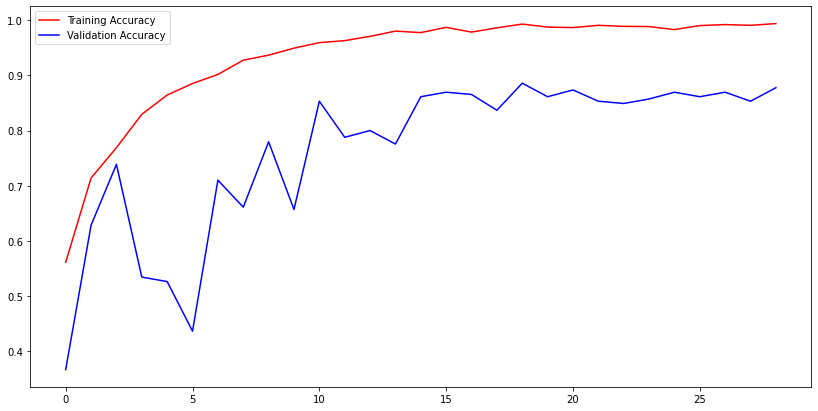

In [38]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

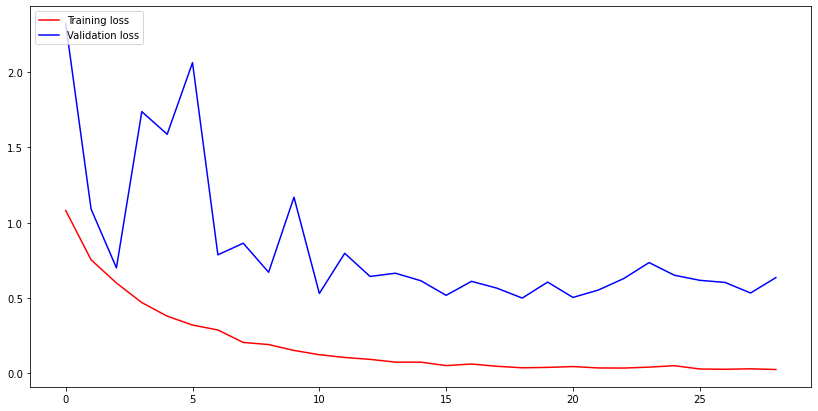

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# img = cv2.imread(r'D:\vita\study\ML\Project_brain Tumor\Testing\Testing\meningioma_tumor\image(7).jpg')
# img = cv2.resize(img,(150,150))
# img_array = np.array(img)
# img_array.shape


In [ ]:
# img_array = img_array.reshape(1,150,150,3)
# img_array.shape

In [ ]:
# from tensorflow.keras.preprocessing import image
# img = image.load_img(r"D:\vita\study\ML\Project_brain Tumor\Testing\Testing\meningioma_tumor\image(7).jpg")
# plt.imshow(img,interpolation='nearest')
# plt.show()

In [ ]:
# a=model.predict(img_array)
# indices = a.argmax()
# indices

In [40]:
y_pred = model.predict(X_test)

26/26 [==============================] - 2s 67ms/step


In [41]:
y_pred_upd = [np.argmax(i) for i in y_pred] 

In [42]:
y_pred_upd

[3,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 3,
 2,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 3,
 2,
 0,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 0,
 2,
 3,
 0,
 2,
 0,
 3,
 3,
 1,
 3,
 0,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 3,
 2,
 3,
 0,
 2,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 3,
 3,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 0,
 2,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 2,
 1,
 3,
 3,
 0,
 0,
 2,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 3,
 2,
 2,
 0,
 1,
 3,
 0,
 2,
 3,
 1,
 2,
 3,
 0,
 3,
 0,
 1,
 3,
 2,
 0,
 2,
 3,
 0,
 2,
 1,
 0,
 3,
 0,
 3,
 1,
 0,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 0,
 1,
 0,
 3,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 3,
 1,
 3,
 1,
 3,
 0,
 1,
 3,
 3,
 2,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 3,


In [43]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [44]:
y_test_upd = [np.argmax(i) for i in y_test]
y_test_upd

[3,
 2,
 0,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 2,
 2,
 3,
 0,
 2,
 3,
 2,
 3,
 2,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 0,
 2,
 3,
 0,
 3,
 0,
 3,
 3,
 2,
 3,
 0,
 3,
 1,
 0,
 2,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 3,
 3,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 2,
 1,
 3,
 3,
 0,
 0,
 2,
 1,
 1,
 3,
 0,
 3,
 0,
 3,
 3,
 2,
 1,
 0,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 3,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 0,
 3,
 3,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 0,
 3,
 0,
 3,
 0,
 1,
 0,
 3,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 3,
 1,
 3,
 0,
 1,
 1,
 3,
 2,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_upd,y_pred_upd))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       205
           1       0.88      0.90      0.89       135
           2       0.91      0.82      0.86       243
           3       0.84      0.90      0.87       233

    accuracy                           0.90       816
   macro avg       0.90      0.90      0.90       816
weighted avg       0.90      0.90      0.90       816



In [46]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('modelfinal_bang_3.pkl', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://448e9c0a-0d31-48d0-84da-d4aec4d9c7c1/assets


INFO:tensorflow:Assets written to: ram://448e9c0a-0d31-48d0-84da-d4aec4d9c7c1/assets
